In [479]:
import pandas as pd

In [480]:
# df_final_complete = pd.read_csv('a:/bloeding-met-patientenlijst-gedetailleerd/df_final_complete.csv')
# df_final_complete.head()


# df_final_complete = pd.read_csv('a:/bloeding-met-patientenlijst-gedetailleerd/df_final_complete1.csv')
# df_final_complete.head()

path = 'a:/test-data'
file_final = 'df_final_complete'

# path = 'a:/test-date-past-month'
# file_final = 'df_final_complete3'

# path = 'a:/test-date-past-month-copy'
# file_final = 'df_final_complete4'

df_final_complete = pd.read_csv(f'{path}/{file_final}.csv') 
df_final_complete.head()


,Unnamed: 0,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,...,high_aptt,high_inr,high_mcv,high_pt,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait
0,0,0001A243648CFB955C3718FD1CE81276D1F4F260,False,False,True,False,False,False,False,False,...,NaN,False,False,False,NaN,False,NaN,False,False,False
1,1,0003C64B626E17E45309A443C70019E76AB0C407,False,True,True,False,True,True,False,False,...,NaN,NaN,False,NaN,False,True,False,False,False,True
2,2,00067EE4483868D5C3EEA1E072648CA61959714D,False,True,True,True,True,True,False,False,...,NaN,NaN,True,NaN,NaN,True,False,False,False,False
3,3,0006C6C74E4AC9C249EBE1F33DAE8EFCCBFBA783,False,False,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,0007089F5A45B8DA493CB883F40336EF4CC3254D,False,False,True,False,True,True,False,False,...,NaN,NaN,False,NaN,False,True,False,False,False,False


In [481]:
df_final_complete.columns

Index(['Unnamed: 0', 'pseudo_id', 'agib_final', 'gib_final', 'scopie_final',
       'treatment_final', 'is_seh', 'is_scopie', 'scopie_after_seh',
       'signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min',
       'sigh_hb_drop_text', 'high_aptt', 'high_inr', 'high_mcv', 'high_pt',
       'high_ureum', 'low_hb', 'low_hematocriet', 'low_mcv', 'low_plt',
       'bora_hb_ait'],
      dtype='object')

In [482]:
df_final_complete[df_final_complete['treatment_final']]['pseudo_id'].nunique()

743

In [483]:
def is_strong_treatment(row):
    return (
        row['treatment_final'] and
        (
            (row['low_hb'] == True) |
            (row['high_inr'] == True) |
            (row['scopie_after_seh'] == True) |
            (row['signficant_hb_drop_7_days'] == True) |
            (row['signficant_hb_drop_7_days_max_min'] == True) |
            (row['sigh_hb_drop_text'] == True) 
            
        )
    )

df_final_complete['treatment_final_strict'] = df_final_complete.apply(is_strong_treatment, axis=1)
print(df_final_complete[df_final_complete['treatment_final_strict']]['pseudo_id'].nunique())
df_final_complete


427


,Unnamed: 0,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,...,high_inr,high_mcv,high_pt,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait,treatment_final_strict
0,0,0001A243648CFB955C3718FD1CE81276D1F4F260,False,False,True,False,False,False,False,False,...,False,False,False,NaN,False,NaN,False,False,False,False
1,1,0003C64B626E17E45309A443C70019E76AB0C407,False,True,True,False,True,True,False,False,...,NaN,False,NaN,False,True,False,False,False,True,False
2,2,00067EE4483868D5C3EEA1E072648CA61959714D,False,True,True,True,True,True,False,False,...,NaN,True,NaN,NaN,True,False,False,False,False,True
3,3,0006C6C74E4AC9C249EBE1F33DAE8EFCCBFBA783,False,False,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,4,0007089F5A45B8DA493CB883F40336EF4CC3254D,False,False,True,False,True,True,False,False,...,NaN,False,NaN,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,3418,F797097BA39F81B05EEC3F251973743CA03CB9B4,False,False,False,False,True,False,False,False,...,NaN,True,True,False,True,True,False,True,True,False
3419,3419,F8C241E69061BB450778B7A4CC336FF520469A0A,False,True,True,False,True,False,False,False,...,NaN,False,NaN,True,True,True,False,True,True,False
3420,3420,F8D116F01EE0039678998F393FA337C10AD4F4E2,False,True,True,True,True,True,True,False,...,False,False,NaN,True,False,False,False,False,False,True
3421,3421,FAA79717FF2C725767E9469350ACECF640E5FCBC,False,False,True,False,True,False,False,False,...,True,False,True,True,True,True,True,False,True,False


In [484]:
df_final_complete[df_final_complete['treatment_final'] != df_final_complete['treatment_final_strict']]

,Unnamed: 0,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,...,high_inr,high_mcv,high_pt,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait,treatment_final_strict
10,10,000E9EB0972843CD358D9A7DEB47179C64820D01,False,False,True,True,False,True,False,False,...,NaN,False,NaN,NaN,False,NaN,False,NaN,False,False
18,18,0011BA87AA8B1197365420CE994756FE970D1EC0,False,True,True,True,False,True,False,False,...,NaN,True,NaN,True,False,False,False,False,False,False
34,34,001DC416FCF5A6E1344A2D37F1AC02AD11805E39,False,False,True,True,True,True,False,False,...,NaN,False,NaN,NaN,False,False,False,False,False,False
105,105,004759984FFEC79E867FD6FE7C223BF91738F154,False,False,True,True,False,True,False,False,...,NaN,False,NaN,NaN,False,False,False,False,False,False
111,111,004ADB26D596A581D88029ABB56F2134874BFC41,False,True,True,True,True,True,False,False,...,NaN,False,False,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,3325,275DB34A355DBC2EB82FBEFA19BDAA3A16EE615C,False,True,True,True,False,True,False,False,...,NaN,True,NaN,False,False,False,False,False,False,False
3330,3330,277295DAC90627B479CB8A123494389397C47A78,False,False,True,True,False,False,False,False,...,NaN,False,NaN,NaN,False,False,False,NaN,True,False
3333,3333,2784741F2936B76F0EC2F34FD9C7409F26C57D01,False,False,True,True,True,False,False,False,...,NaN,False,True,False,False,False,False,False,False,False
3334,3334,27884678665337F62E059EE5BC638B29B28E384E,False,False,True,True,True,True,False,False,...,NaN,False,NaN,False,False,False,False,False,False,False


In [485]:
df_final_complete[df_final_complete['gib_final'] == False]['pseudo_id']

0       0001A243648CFB955C3718FD1CE81276D1F4F260
3       0006C6C74E4AC9C249EBE1F33DAE8EFCCBFBA783
4       0007089F5A45B8DA493CB883F40336EF4CC3254D
5       00070E2BFD96888BC86575D9DC91F10A8D5B017C
7       000BBF5123D6F1E8E02D194D6CB8B0299D180287
                          ...                   
3398    CF58B7215ED673FD2AC116C49953A9941E73F597
3402    D5454CFC13F8A58EB3E0B964D1D9B4199C0B0501
3407    E30405A5247BE2EFBEE529FD3FD26EB70B03594D
3418    F797097BA39F81B05EEC3F251973743CA03CB9B4
3421    FAA79717FF2C725767E9469350ACECF640E5FCBC
Name: pseudo_id, Length: 2218, dtype: object

In [486]:
df_final_complete['likely_gib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (df_final_complete['high_ureum'] == True)
) 


df_final_complete['likely_gib_bleed'].value_counts()

False    3042
True      381
Name: likely_gib_bleed, dtype: int64

In [487]:
df_final_complete['likely_gib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (df_final_complete['high_ureum'] == True)
) | (
    df_final_complete[[
        'low_hb', 'low_hematocriet', 'low_plt',
        'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2
)

df_final_complete['likely_gib_bleed'].value_counts()

False    2539
True      884
Name: likely_gib_bleed, dtype: int64

In [488]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (
        # (df_final_complete['is_seh'] == True) |
        (df_final_complete['scopie_after_seh'] == True) |
        (df_final_complete['signficant_hb_drop_7_days'] == True)
    )
)

df_final_complete['likely_agib_bleed'].value_counts()

False    3314
True      109
Name: likely_agib_bleed, dtype: int64

In [489]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['low_hb'] == True) & (
        (df_final_complete['is_seh'] == True) |
        (df_final_complete['scopie_after_seh'] == True) |
        (df_final_complete['signficant_hb_drop_7_days'] == True) |
        (df_final_complete['gib_final'] == True) |
        (df_final_complete['agib_final'] == True) 
    )
)

df_final_complete['likely_agib_bleed'].value_counts()

False    2460
True      963
Name: likely_agib_bleed, dtype: int64

In [490]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['signficant_hb_drop_7_days'] == True) & (
        df_final_complete['scopie_after_seh'] == True)

)
df_final_complete['likely_agib_bleed'].value_counts()

False    3408
True       15
Name: likely_agib_bleed, dtype: int64

In [491]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    (df_final_complete['signficant_hb_drop_7_days'] == True) & (
        df_final_complete['scopie_after_seh'] == True)
    )

)

df_final_complete['likely_agib_bleed'].value_counts()

False    3404
True       19
Name: likely_agib_bleed, dtype: int64

In [492]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
        df_final_complete['scopie_after_seh'] == True)
    )

    # (df_final_complete['low_hb'] == True) & (
    #     (df_final_complete['is_seh'] == True) |
    #     (df_final_complete['scopie_after_seh'] == True) |
    #     (df_final_complete['signficant_hb_drop_7_days'] == True) |
    #     (df_final_complete['gib_final'] == True) |
    #     (df_final_complete['agib_final'] == True) 
    # )
)

df_final_complete['likely_agib_bleed'].value_counts()

False    3257
True      166
Name: likely_agib_bleed, dtype: int64

In [493]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    # (df_final_complete['signficant_hb_drop_7_days'] == True) | 
    #     df_final_complete['scopie_after_seh'] == True) | (
    #     (df_final_complete['low_hb'] == True) & (
    #         df_final_complete['high_ureum'] == True) | (

        (df_final_complete['gib_final'] == True) & (
            (df_final_complete['low_hb'] == True) & (
                df_final_complete['high_ureum'] == True)) | (
                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                        df_final_complete['scopie_after_seh'] == True)
                    ) | (
                        df_final_complete[[
                            'low_hb', 'low_hematocriet', 'low_plt',
                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                        ]].sum(axis=1, skipna=True) >= 2
                        
                    )
            )
    )


df_final_complete['likely_agib_bleed'].value_counts()

False    2518
True      905
Name: likely_agib_bleed, dtype: int64

In [494]:
# df_final_complete

In [495]:
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) | (
    # (df_final_complete['signficant_hb_drop_7_days'] == True) | 
    #     df_final_complete['scopie_after_seh'] == True) | (
    #     (df_final_complete['low_hb'] == True) & (
    #         df_final_complete['high_ureum'] == True) | (

        (df_final_complete['gib_final'] == True) & (
            (df_final_complete['low_hb'] == True) & (
                df_final_complete['high_ureum'] == True)) | (

                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                        df_final_complete['scopie_after_seh'] == True)
                    ) | (
                        df_final_complete[[
                            'low_hb', 'low_hematocriet', 'low_plt',
                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                        ]].sum(axis=1, skipna=True) >= 2
                        
                    ) | (
                        (df_final_complete['treatment_final'] == True) & (
                            df_final_complete['low_hb'] == True) | (
                                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                                        df_final_complete['scopie_after_seh'] == True)
                                    ) | (
                                        df_final_complete[[
                                            'low_hb', 'low_hematocriet', 'low_plt',
                                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                                        ]].sum(axis=1, skipna=True) >= 2
                                        
                                    )
                        | (
                        (df_final_complete['scopie_final'] == True) & (
                            df_final_complete['low_hb'] == True) | (
                                    (df_final_complete['signficant_hb_drop_7_days'] == True) | (
                                        df_final_complete['scopie_after_seh'] == True)
                                    ) | (
                                        df_final_complete[[
                                            'low_hb', 'low_hematocriet', 'low_plt',
                                            'low_mcv', 'high_inr', 'high_aptt', 'high_pt'
                                        ]].sum(axis=1, skipna=True) >= 2
                                        
                                    )
            )))
    )


df_final_complete['likely_agib_bleed'].value_counts()

False    2302
True     1121
Name: likely_agib_bleed, dtype: int64

In [496]:
# Define helper logic blocks
lab_criteria = (
    (df_final_complete['low_hb'] == True) &
    (df_final_complete['high_ureum'] == True)
) | (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

extra_criteria = (
    (df_final_complete['signficant_hb_drop_7_days'] == True) |
    (df_final_complete['scopie_after_seh'] == True)
)

treatment_pathway = (
    (df_final_complete['treatment_final_strict'] == True) 
)

scopie_pathway = (
    (df_final_complete['scopie_final'] == True) 
)

gib_pathway = (df_final_complete['gib_final'] == True    )


# Final likely AGIB decision
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway
)

df_final_complete['likely_agib_bleed'].value_counts()

True     2512
False     911
Name: likely_agib_bleed, dtype: int64

In [497]:
# Define helper logic blocks
lab_criteria = (
    (df_final_complete['low_hb'] == True) &
    (df_final_complete['high_ureum'] == True)
) | (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

extra_criteria = (
    # (df_final_complete['final_hb_drop_evidence'] == True) |
    (df_final_complete['scopie_after_seh'] == True) |
    (df_final_complete['is_seh'] == True) 
)

treatment_pathway = (
    (df_final_complete['treatment_final_strict'] == True) & (
        df_final_complete['low_hb'] == True | extra_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df_final_complete['scopie_final'] == True) &     
    (df_final_complete['gib_final'] == True) &
    (df_final_complete['low_hb'] == True | extra_criteria | lab_criteria)
)

gib_pathway = (
    (df_final_complete['gib_final'] == True) & (lab_criteria)
    )


# Final likely AGIB decision
df_final_complete['likely_agib_bleed'] = (
    (df_final_complete['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway
)

df_final_complete['likely_agib_bleed'].value_counts()

False    2778
True      645
Name: likely_agib_bleed, dtype: int64

In [498]:
print("Total likely AGIB:", df_final_complete['likely_agib_bleed'].sum())
print("AGIB (text only):", df_final_complete['agib_final'].sum())
print("GIB + labs:", gib_pathway.sum())
print("Treatment-based AGIB:", treatment_pathway.sum())
print("Scopie-based AGIB:", scopie_pathway.sum())


Total likely AGIB: 645
AGIB (text only): 4
GIB + labs: 448
Treatment-based AGIB: 357
Scopie-based AGIB: 523


In [499]:
only_scopie = df_final_complete[
    (scopie_pathway) & 
    ~(df_final_complete['agib_final'] | gib_pathway | treatment_pathway)
]
print(f"AGIB patients only via scopie: {len(only_scopie)}")


AGIB patients only via scopie: 67


In [500]:
print(df_final_complete['gib_final'].value_counts(dropna=False))
print(df_final_complete['likely_gib_bleed'].value_counts(dropna=False))

print(df_final_complete['agib_final'].value_counts(dropna=False))
print(df_final_complete['likely_agib_bleed'].value_counts(dropna=False))


False    2218
True     1205
Name: gib_final, dtype: int64
False    2539
True      884
Name: likely_gib_bleed, dtype: int64
False    3419
True        4
Name: agib_final, dtype: int64
False    2778
True      645
Name: likely_agib_bleed, dtype: int64


In [501]:
# pip install matplotlib_venn

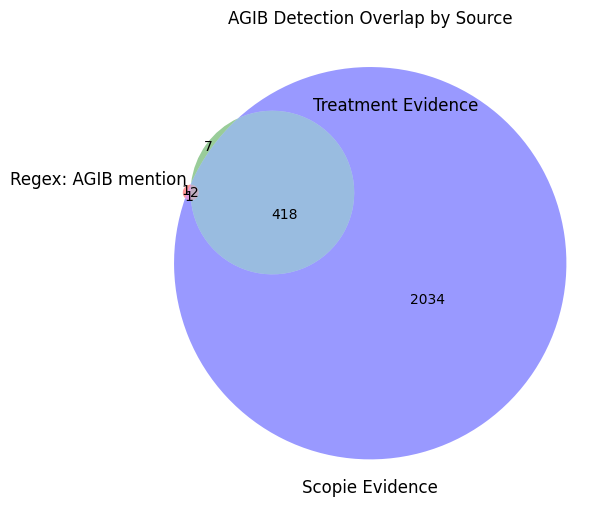

In [502]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define sets based on pseudo_id
regex_set = set(df_final_complete[df_final_complete['agib_final'] == True]['pseudo_id'])
treatment_set = set(df_final_complete[df_final_complete['treatment_final_strict'] == True]['pseudo_id'])
scopie_set = set(df_final_complete[df_final_complete['scopie_final'] == True]['pseudo_id'])

# Plot Venn Diagram
plt.figure(figsize=(7, 6))
venn3(
    subsets=(regex_set, treatment_set, scopie_set),
    set_labels=('Regex: AGIB mention', 'Treatment Evidence', 'Scopie Evidence')
)
plt.title("AGIB Detection Overlap by Source")
plt.show()


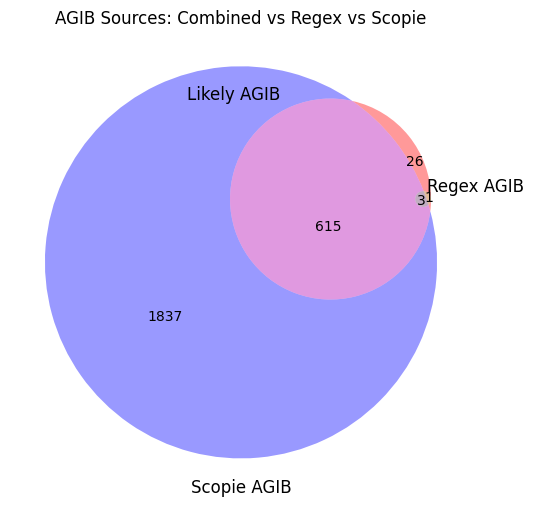

In [503]:
from matplotlib_venn import venn3

plt.figure(figsize=(7, 6))
venn3(
    subsets=(
        set(df_final_complete[df_final_complete['likely_agib_bleed']]['pseudo_id']),
        set(df_final_complete[df_final_complete['agib_final']]['pseudo_id']),
        set(df_final_complete[df_final_complete['scopie_final']]['pseudo_id']),
    ),
    set_labels=('Likely AGIB', 'Regex AGIB', 'Scopie AGIB')
)
plt.title("AGIB Sources: Combined vs Regex vs Scopie")
plt.show()


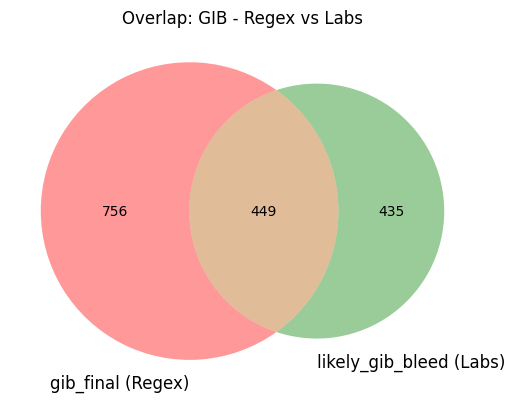

In [504]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
venn2(
    subsets=(
        set(df_final_complete[df_final_complete['gib_final'] == True]['pseudo_id']),
        set(df_final_complete[df_final_complete['likely_gib_bleed'] == True]['pseudo_id'])
    ),
    set_labels=('gib_final (Regex)', 'likely_gib_bleed (Labs)')
)
plt.title("Overlap: GIB - Regex vs Labs")
plt.show()


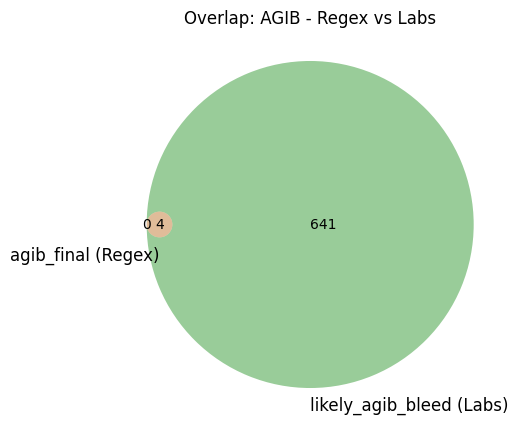

In [505]:
plt.figure(figsize=(6, 5))
venn2(
    subsets=(
        set(df_final_complete[df_final_complete['agib_final'] == True]['pseudo_id']),
        set(df_final_complete[df_final_complete['likely_agib_bleed'] == True]['pseudo_id'])
    ),
    set_labels=('agib_final (Regex)', 'likely_agib_bleed (Labs)')
)
plt.title("Overlap: AGIB - Regex vs Labs")
plt.show()

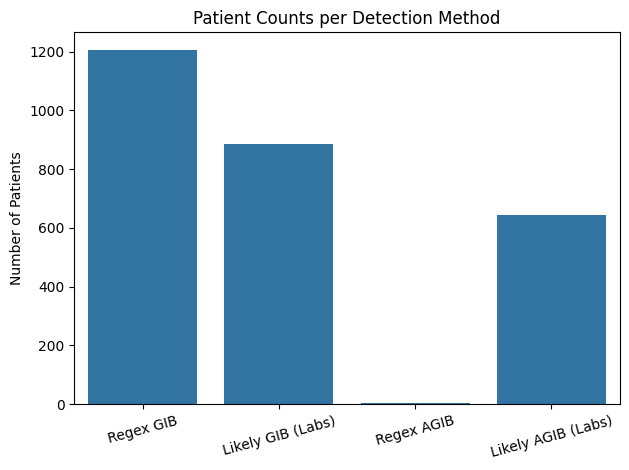

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = {
    'Regex GIB': df_final_complete['gib_final'].sum(),
    'Likely GIB (Labs)': df_final_complete['likely_gib_bleed'].sum(),
    'Regex AGIB': df_final_complete['agib_final'].sum(),
    'Likely AGIB (Labs)': df_final_complete['likely_agib_bleed'].sum(),
}

sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Patient Counts per Detection Method")
plt.ylabel("Number of Patients")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


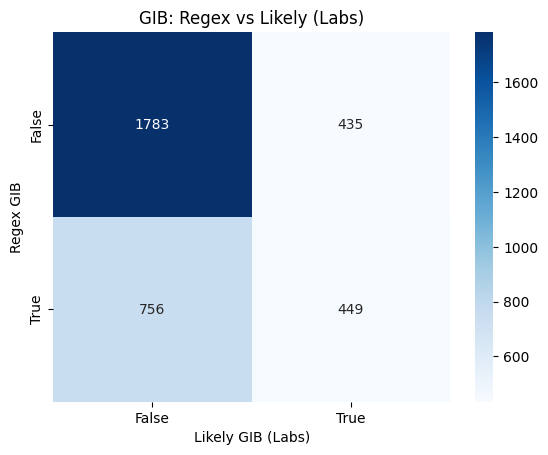

In [507]:
import pandas as pd

cross_gib = pd.crosstab(df_final_complete['gib_final'], df_final_complete['likely_gib_bleed'])
sns.heatmap(cross_gib, annot=True, fmt='d', cmap='Blues')
plt.title("GIB: Regex vs Likely (Labs)")
plt.xlabel("Likely GIB (Labs)")
plt.ylabel("Regex GIB")
plt.show()


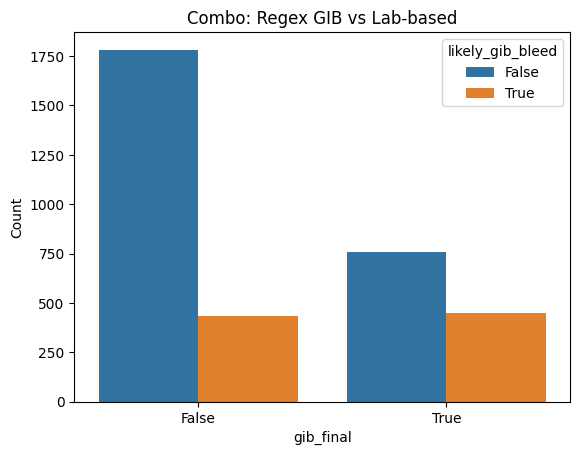

In [508]:
combo_counts = df_final_complete.groupby(
    ['gib_final', 'likely_gib_bleed']
).size().reset_index(name='count')

sns.barplot(data=combo_counts, x='gib_final', y='count', hue='likely_gib_bleed')
plt.title("Combo: Regex GIB vs Lab-based")
plt.xlabel("gib_final")
plt.ylabel("Count")
plt.show()


In [509]:
agib_patients_list = ['046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6',
       '088C9FD98B8B2CBCB597C17C07AC1845B21F0849',
       '0A5645E02FA818D1629926B6BEFA81CF91C25A46',
       '0BC512A65442D0BB4B00FBE05E7EA6283E5C11FD',
       '0DD73490997F61870C32B3BB7C9CDE4E801FFF7D',
       '0E041554A0B23505AD762D006AB320CF4AF8F969',
       '0E93D98E82D272810A15FDE70270EE41E9C6DB71',
       '12D65DA1F4CFAC101DE53C050C9037D97F42FC18',
       '15CF926899FB0141DABA60251D292FCC89C94C1B',
       '19AD86175C45ED2AA0F752E0178000144E7FEF28',
       '20AAD8E38E7C9D75E44F9EA52336B7003ED239BD',
       '21031C9814F3BD6EFACD9FBC5AF409820CDABAB4',
       '21A750B9A8AB03B4A250D19577A0734E080BC743',
       '2242661E0D65C316E93EF5328929944799379F22',
       '23E295F4F8F7550C76B6C22ABDA7DFFB3FCF1682',
       '2562E6AE0D16F0504B50CEE14D0D1F0A37596ED8',
       '29871744C90865C3425F00A1935BFF9D2354DA44', #missing
       '29B3653AE690547AB14AC7FCD32B21A561D5FF9A',
       '2E7E9399C8366C94770E35BC822203C1B0BDAB07',
       '355F07B9B6AF154431F346CBC4A6722294250C43',
       '3605432FE03B28514E3927DA7E5C53BD177BFD31',
       '36B03320CFFDB5C757F2DF59633886CF0D05AF9D',
       '37099C38CFE1055CF6950B3D61CEC774849364D9',
       '37BFA228DFA04BE0596DCCC63D245B42B3A15727',
       '395219FA6E57FE6DA93F36F3EB68F4667D325895',
       '3B21EF377C1BA327A67C2C951A6CB78BEAD5B3FE',
       '3E1358F31EE82F5EBEF7B2F93DB6E30656B0D694',
       '40FF2EE78841C453C1C673E9047BABC03DD6CCEE',
       '4638DB7DCC0B32533B044E06CE9720FB9F729D64',
       '4D22E67480A038F4FEA67046F5706560CBB06C27',
       '52EE37A2B81CD38A3062B4B7B216EDBB8BE07E6C',
       '5C16934C56472DEB342641D17FB13F9AEFEEFFAB',
       '60116AB3A826FD9A59CBE6B123866D177A40FAF4',
       '618F149E27BFA64EBFEC903D49A75AAF88BD75B2',
       '6273B4D1B5AF27A667D048CD06A900C9751F8357',
       '65F35D3FB57B75161F6854ACD38FBEB77A0394B0',
       '67A836EEF5B75637507621800CA8F8C0CAC23DCE',
       '6CF1734B040468B6802E26DFA5BC6B6FF6869362',
       '6E3082A914A5A2ACE5B7F0B1F0C1294221BBD9C1',
       '706C18D256797B3BAFC980C49CA839BB467F6B5F',
       '7087EB7CD49F67A7A8E51203DE7C0F9FFBBFB51B',
       '708E355575D017D3349A8FADE56EC4CE1059C187',
       '7561B5E32DE738229F2D658FBAACEFFE80B50600',
       '7CDC164CC77C52E6E71C9DFB08925F79F8F1176D',
       '819049AF3EE8DE15E28B232DC3E2A192F6D0E6B4',
       '82513FFD34AAEE0A2C6BD8DBAE3B6E69B3CA21D5',
       '82A5BDCD295AC677FBAB42B490D1D3B119BA982D',
       '895342BFD0D1C32FFF8F009C0E20CBE97B04677D',
       '89AC6D361AFD06F17C1D3A2865C3B42BD8F40111',  # mssing
       '8BDF23D9D3F6550DC2EAB386B28FD58203CCF2CC',
       '8CAE818529D2702AD874E91A5403942857128837',
       '8D59B35BBF1DD6A47DEE04D5CE8BE848639D9A73',
       '922EF6916F338885CD4EA526758009EF4B9562FF',
       '94876C5A2D72759210A854698D5A5E012C2ED946',
       '9577D4850CAA322401163181BB1A3634F653683A',
       '96764B9E95688ACB64A6C8E99AC2E6D5828BED12',
       '9763CE55BAB3BF537B9309F9A7A6085F86ED878A',
       '9A5F28B3534569F4F2EF8F9C7CCD12F102A511D3',
       '9D7272899F6DDA3E2FBEF3CCD3E877F61050EE3D',
       'A1F0A5E51B85D3645FDB7A86F6020BF25CDF6448',
       'A433FE2B40A498426221B22B8BF25B666DAA1ABB',
       'A75FEC66C73E482282B5537091BFBD0814458EAA',
       'A8FA2D94EA62234A97F2D21737D6046198E67B20',
       'A9A2482C557733BFC15A7DEAC217F8766D37FAA1',
       'AD8F8139A8218F848C7028714A7575467122C538',
       'B3EED5BDCD189C8E78AEC6626C504EA16EC0C290',
       'B4F185DF5CC6BA66AC14EBD0972CCCF7AFC77ED5',
       'BAE82DBED446134D3759C32B5457D88A06F8F6AD',
       'BEBEFC726C577A7B40F1A467F4E59746FBC7F76B',
       'C3D2B6A01031F432C2509DC715C07C9FEBE7A93A',
       'C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A',  # mssing
       'C6ED8A9D7F8FC139BED68EA0553DC3703DB6A1E0',
       'C71B153E9F184C29E8D39654E41C8B54586E3AF4',
       'C775682FCB29A890D7B64B211F17DFF3D8867951',
       'C7897B7EA4E1B9607944C6F8FCDED3C759F3E7B5',
       'C7C86E1AA957D3F18CD7803ABCBE9D63C07AFCCA',
       'CB30ED9CF2F8BE2FABC260C6990B8305E2C09F37',
       'CB4C3724C73ACD6A03171F56276697AD07B49105',
       'CC5561A5F783FAF250D15C10B724E5AC1F0A9E62',
       'CEA4E6D31E5967750EF8E86C4DBC14D892475FFD',
       'CF58B7215ED673FD2AC116C49953A9941E73F597',
       'D03939761BC11D044530F640971D703055A53552',
       'D25F6785232C8650378EAE7E1D994F3506AEF6DA',
       'D30EB04A0947E012105B292E735B8AD3450A12C6',
       'D5454CFC13F8A58EB3E0B964D1D9B4199C0B0501',
       'D9CCFA8F9DBD7233A09EB2ED21F53D791D96B92E',
       'DB713A8F5F17426A57148E54A958A9C2BB241ECC',
       'DD14A8EB729CA98BF5840DA7373992442B0B13CA',
       'DE46AEBDCCE508CE8C7003D46CFE807F4EF978DF',
       'E30405A5247BE2EFBEE529FD3FD26EB70B03594D',
       'E506A62C8E7FC7F419C0023940AA65942115CEEC',
       'E5969D3A741FDA5B3067AD81444CB371178C8486',
       'E84FCF9247E1942F4BFB4C24858ABD7D9297A367',
       'EAFC408AB3740C84E37F7C87896433366F55DCF7',
       'EC46C3AA9E8858EBAEFEB2C1A429DBD6BA8783BE',
       'EC6EED9DCF9A5CD8EDAC5DB8A9C9D339C7FC89DC',
       'EF04810F281C202634208F2091141C40EBD2BC3A',
       'F1A9118C0173EE18FA3D3E49616A91D28ABED78C',
       'F5F86E4F57D98E65D464A42AC325615EFE0D5C31',
       'F63683C1B401C1929E4B45EDBCE3E4CE7757EE9F',
       'F797097BA39F81B05EEC3F251973743CA03CB9B4',
       'F8C241E69061BB450778B7A4CC336FF520469A0A',
       'F8D116F01EE0039678998F393FA337C10AD4F4E2',
       'FAA79717FF2C725767E9469350ACECF640E5FCBC',
       'FD8C682C1F4FDA1E5EC0B760D30875556419BD71']

len(agib_patients_list)

105

In [510]:
df_final_complete['true_label'] = 0  # All positive cases

# if df_final_complete['pseudo_id'].isin(agib_patients_list).any():
#     df_final_complete.loc[df_final_complete['pseudo_id'].isin(agib_patients_list), 'true_label'] = 1

# for i in range(len(df_final_complete)):
#     if df_final_complete['pseudo_id'][i] in agib_patients_list:
#         print(f"Patient {df_final_complete['pseudo_id'][i]} is in the AGIB list, setting true_label to 1")
#         df_final_complete['true_label'][i] = 1
#     else:
#         df_final_complete['true_label'][i] = 0

for i in range(len(df_final_complete)):
    for j in range(len(agib_patients_list)):
        if df_final_complete['pseudo_id'][i] == agib_patients_list[j]:
            # print(f"Patient {df_final_complete['pseudo_id'][i]} is in the AGIB list, setting true_label to 1")
            # print(df_final_complete['pseudo_id'][i])
            df_final_complete.at[i, 'true_label'] = 1
            break


df_final_complete['true_label'].value_counts()  

# df_final_complete = df_final_complete[df_final_complete['true_label'] == 1]


0    3322
1     101
Name: true_label, dtype: int64

In [511]:
included_patient_list = df_final_complete[df_final_complete['true_label'] == 1]['pseudo_id'].unique().tolist()

set(agib_patients_list) - set(included_patient_list)

{'29871744C90865C3425F00A1935BFF9D2354DA44',
 '82A5BDCD295AC677FBAB42B490D1D3B119BA982D',
 '89AC6D361AFD06F17C1D3A2865C3B42BD8F40111',
 'C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A'}

In [512]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classifier(pred_col):
    y_true = df_final_complete['true_label']
    y_pred = df_final_complete[pred_col].fillna(False).astype(int)

    print(f"--- Evaluation for: {pred_col} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))  # Sensitivity — how many AGIBs you captured
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    print()

# Evaluate your detection approaches
evaluate_classifier('agib_final')
evaluate_classifier('likely_agib_bleed')
# evaluate_classifier('(a)gib_final')  # if this is another combined signal


--- Evaluation for: agib_final ---
Accuracy : 0.9699094361671049
Precision: 0.25
Recall   : 0.009900990099009901
F1 Score : 0.01904761904761905
Confusion matrix:
 [[3319    3]
 [ 100    1]]

--- Evaluation for: likely_agib_bleed ---
Accuracy : 0.8235465965527315
Precision: 0.11007751937984496
Recall   : 0.7029702970297029
F1 Score : 0.1903485254691689
Confusion matrix:
 [[2748  574]
 [  30   71]]



In [513]:
# Patients not picked up by a rule
df_final_complete[(df_final_complete['likely_agib_bleed'] == False)]



,Unnamed: 0,pseudo_id,agib_final,gib_final,scopie_final,treatment_final,is_seh,is_scopie,scopie_after_seh,signficant_hb_drop_7_days,...,high_ureum,low_hb,low_hematocriet,low_mcv,low_plt,bora_hb_ait,treatment_final_strict,likely_gib_bleed,likely_agib_bleed,true_label
0,0,0001A243648CFB955C3718FD1CE81276D1F4F260,False,False,True,False,False,False,False,False,...,NaN,False,NaN,False,False,False,False,False,False,0
3,3,0006C6C74E4AC9C249EBE1F33DAE8EFCCBFBA783,False,False,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0
4,4,0007089F5A45B8DA493CB883F40336EF4CC3254D,False,False,True,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,0
5,5,00070E2BFD96888BC86575D9DC91F10A8D5B017C,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,True,False,0
6,6,00092AD0261B74F4A045C46F099C6639F180698D,False,True,True,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,3402,D5454CFC13F8A58EB3E0B964D1D9B4199C0B0501,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,1
3407,3407,E30405A5247BE2EFBEE529FD3FD26EB70B03594D,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3418,3418,F797097BA39F81B05EEC3F251973743CA03CB9B4,False,False,False,False,True,False,False,False,...,False,True,True,False,True,True,False,True,False,1
3420,3420,F8D116F01EE0039678998F393FA337C10AD4F4E2,False,True,True,True,True,True,True,False,...,True,False,False,False,False,False,True,False,False,1


In [514]:
df_final_complete.columns

Index(['Unnamed: 0', 'pseudo_id', 'agib_final', 'gib_final', 'scopie_final',
       'treatment_final', 'is_seh', 'is_scopie', 'scopie_after_seh',
       'signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min',
       'sigh_hb_drop_text', 'high_aptt', 'high_inr', 'high_mcv', 'high_pt',
       'high_ureum', 'low_hb', 'low_hematocriet', 'low_mcv', 'low_plt',
       'bora_hb_ait', 'treatment_final_strict', 'likely_gib_bleed',
       'likely_agib_bleed', 'true_label'],
      dtype='object')

Results for report


In [515]:
# List of the boolean columns you're interested in
criteria_cols = [
        'agib_final', 'gib_final', 'scopie_final',
       'treatment_final', 'is_seh', 'is_scopie', 'scopie_after_seh',
       'signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min',
       'sigh_hb_drop_text'
]

# Count how many patients meet each criterion
for col in criteria_cols:
    print(f"\n📊 Value counts for '{col}':")
    print(df_final_complete[col].value_counts())


📊 Value counts for 'agib_final':
False    3419
True        4
Name: agib_final, dtype: int64

📊 Value counts for 'gib_final':
False    2218
True     1205
Name: gib_final, dtype: int64

📊 Value counts for 'scopie_final':
True     2455
False     968
Name: scopie_final, dtype: int64

📊 Value counts for 'treatment_final':
False    2680
True      743
Name: treatment_final, dtype: int64

📊 Value counts for 'is_seh':
True     2267
False    1156
Name: is_seh, dtype: int64

📊 Value counts for 'is_scopie':
True     1975
False    1448
Name: is_scopie, dtype: int64

📊 Value counts for 'scopie_after_seh':
False    3277
True      146
Name: scopie_after_seh, dtype: int64

📊 Value counts for 'signficant_hb_drop_7_days':
False    3391
True       32
Name: signficant_hb_drop_7_days, dtype: int64

📊 Value counts for 'signficant_hb_drop_7_days_max_min':
False    3376
True       47
Name: signficant_hb_drop_7_days_max_min, dtype: int64

📊 Value counts for 'sigh_hb_drop_text':
False    3116
True      307
Name

In [516]:


# List of the boolean columns you're interested in
lab_cols = [
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]

# Count how many patients meet each criterion
for col in lab_cols:
    print(f"\n📊 Value counts for '{col}':")
    print(df_final_complete[col].value_counts())


📊 Value counts for 'low_hb':
False    1899
True     1122
Name: low_hb, dtype: int64

📊 Value counts for 'low_hematocriet':
False    1911
True      646
Name: low_hematocriet, dtype: int64

📊 Value counts for 'low_plt':
False    2385
True      272
Name: low_plt, dtype: int64

📊 Value counts for 'high_ureum':
False    1230
True      640
Name: high_ureum, dtype: int64

📊 Value counts for 'high_mcv':
False    2709
True      241
Name: high_mcv, dtype: int64

📊 Value counts for 'high_inr':
False    297
True     100
Name: high_inr, dtype: int64

📊 Value counts for 'high_aptt':
False    248
True      75
Name: high_aptt, dtype: int64

📊 Value counts for 'high_pt':
False    216
True     125
Name: high_pt, dtype: int64


In [517]:
df = df_final_complete.copy()

In [518]:
# # Conservative AGIB logic
# df['final_agib_label'] = (
#     df['gib_final'] &
#     df['treatment_final_strict'] &
#     (df['signficant_hb_drop_7_days_max_min'] | df['scopie_after_seh'])
# )


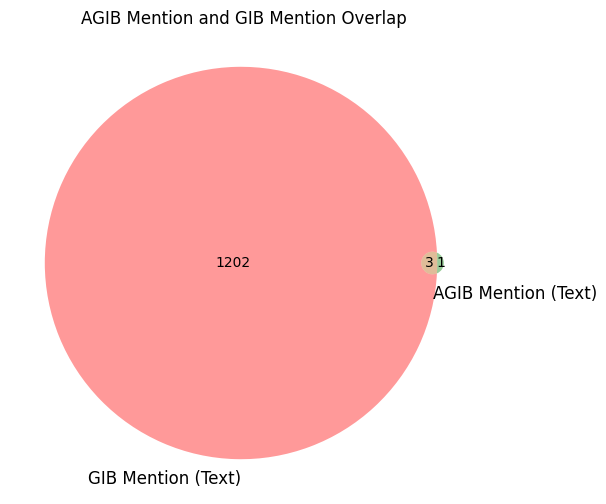

In [519]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define sets based on pseudo_id
set1 = set(df[df['gib_final'] == True]['pseudo_id'].unique())
set2 = set(df[df['agib_final'] == True]['pseudo_id'].unique())
# set3 = set(df[df['sigh_hb_drop_text'] == True]['pseudo_id'].unique())

# Plot Venn Diagram
plt.figure(figsize=(7, 6))
venn2([set1, set2,], set_labels=('GIB Mention (Text)', 'AGIB Mention (Text)'))
plt.title("AGIB Mention and GIB Mention Overlap")
plt.show()

In [520]:
# df['agib_label_two_of_three'] = (
#     (
#         df['gib_final'].astype(int) +
#         df['signficant_hb_drop_7_days_max_min'].astype(int) +
#         df['scopie_after_seh'].astype(int)
#     ) >= 2
# )

# df['agib_label_two_of_three'].value_counts()

In [521]:
df['agib_label_text_only'] = df['agib_final']


In [522]:
# agib_cols = [
#     'agib_label_conservative',
#     'agib_label_moderate',
#     'agib_label_treatment_lab',
#     'agib_label_two_of_three',
#     'agib_label_text_only'
# ]

# for col in agib_cols:
#     print(f"{col}: {df[col].sum()} patients labeled AGIB")


In [523]:
# from sklearn.metrics import classification_report

# for col in agib_cols:
#     print(f"\n--- {col} ---")
#     print(classification_report(df['true_label'], df[col].astype(int)))


In [524]:
from sklearn.metrics import classification_report

for col in ['signficant_hb_drop_7_days', 'signficant_hb_drop_7_days_max_min', 'sigh_hb_drop_text']:
    print(f"\n=== {col} ===")
    print(classification_report(df['true_label'], df[col].fillna(False).astype(int)))



=== signficant_hb_drop_7_days ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3322
           1       0.50      0.16      0.24       101

    accuracy                           0.97      3423
   macro avg       0.74      0.58      0.61      3423
weighted avg       0.96      0.97      0.96      3423


=== signficant_hb_drop_7_days_max_min ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3322
           1       0.45      0.21      0.28       101

    accuracy                           0.97      3423
   macro avg       0.71      0.60      0.63      3423
weighted avg       0.96      0.97      0.96      3423


=== sigh_hb_drop_text ===
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3322
           1       0.21      0.63      0.31       101

    accuracy                           0.92      3423
   macro avg       0.60

In [525]:
df['agib_label_conservative'] = (
    df['gib_final'] &
    # df['treatment_final_strict'] &
    (df['signficant_hb_drop_7_days_max_min'] | df['scopie_after_seh'])
)

df['agib_label_conservative'].value_counts()


False    3279
True      144
Name: agib_label_conservative, dtype: int64

In [526]:
df['has_structured_hb_drop'] = (
    df['signficant_hb_drop_7_days'] |
    df['signficant_hb_drop_7_days_max_min']
)

df['final_hb_drop_evidence'] = (
    df['has_structured_hb_drop'] |
    df['sigh_hb_drop_text']
)


df['final_hb_drop_evidence'].value_counts()

False    3099
True      324
Name: final_hb_drop_evidence, dtype: int64

In [527]:
len(df[df['sigh_hb_drop_text'] == True]['pseudo_id'])

307

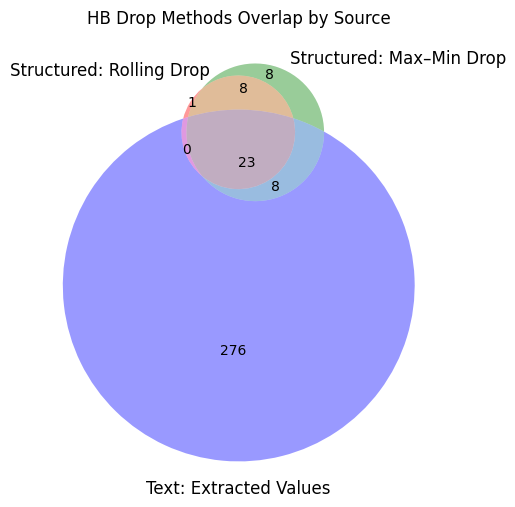

In [528]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define sets based on pseudo_id
set1 = set(df[df['signficant_hb_drop_7_days'] == True]['pseudo_id'].unique())
set2 = set(df[df['signficant_hb_drop_7_days_max_min'] == True]['pseudo_id'].unique())
set3 = set(df[df['sigh_hb_drop_text'] == True]['pseudo_id'].unique())

# Plot Venn Diagram
plt.figure(figsize=(7, 6))
venn3([set1, set2, set3], set_labels=('Structured: Rolling Drop', 'Structured: Max–Min Drop', 'Text: Extracted Values'))
plt.title("HB Drop Methods Overlap by Source")
plt.show()

In [529]:
df['agib_label_strict'] = (
    df['gib_final'] &
    df['scopie_after_seh'] &
    df['final_hb_drop_evidence'] &
    df['is_seh']
)

df['agib_label_strict'].value_counts()

False    3350
True       73
Name: agib_label_strict, dtype: int64

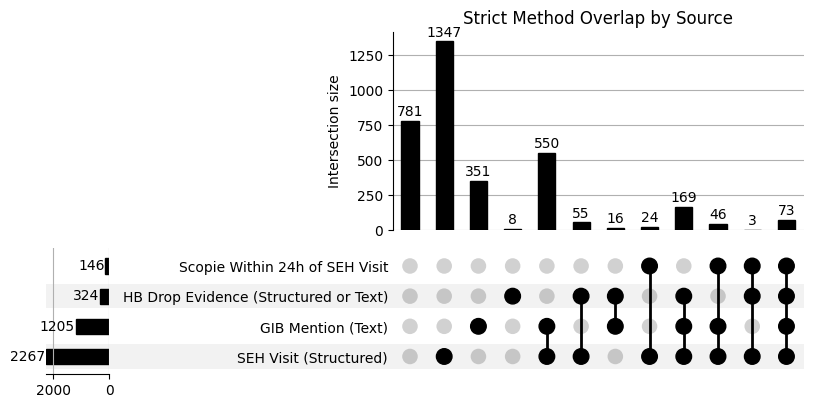

In [530]:
# # Install the required library
# %pip install upsetplot

from upsetplot import UpSet
import matplotlib.pyplot as plt
import pandas as pd

# Define sets based on pseudo_id
set1 = set(df[df['gib_final'] == True]['pseudo_id'].unique())
set2 = set(df[df['is_seh'] == True]['pseudo_id'].unique())
set3 = set(df[df['scopie_after_seh'] == True]['pseudo_id'].unique())
set4 = set(df[df['final_hb_drop_evidence'] == True]['pseudo_id'].unique())

# Create a DataFrame for UpSet plot
data = pd.DataFrame({
    'GIB Mention (Text)': df['pseudo_id'].isin(set1),
    'SEH Visit (Structured)': df['pseudo_id'].isin(set2),
    'Scopie Within 24h of SEH Visit': df['pseudo_id'].isin(set3),
    'HB Drop Evidence (Structured or Text)': df['pseudo_id'].isin(set4),
})

from upsetplot import from_memberships

# Convert the data to the required format for UpSet
memberships = []
for index, row in data.iterrows():
    memberships.append(
        [col for col, value in row.items() if value == 1]
    )

# Create the UpSet plot
upset_data = from_memberships(memberships)
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("Strict Method Overlap by Source")
plt.show()

In [531]:
print(upset_data)

GIB Mention (Text)  HB Drop Evidence (Structured or Text)  SEH Visit (Structured)  Scopie Within 24h of SEH Visit
False               False                                  False                   False                             1
True                False                                  True                    False                             1
                    True                                   True                    False                             1
False               False                                  True                    False                             1
                                                                                   False                             1
                                                                                                                    ..
                                                                                   False                             1
True                False                            

In [532]:
df['agib_label_less_strict'] = (
    df['gib_final'] & 
    (
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2
    )
    
)

df['agib_label_less_strict'].value_counts()

False    3135
True      288
Name: agib_label_less_strict, dtype: int64

In [533]:
df['abnormal_lab_panel'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 2
)


df['abnormal_lab_panel_strict'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 3
)

df['abnormal_lab_panel_4_strict'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 4
)

df['abnormal_lab_panel_5_strict'] = (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 5
)

print(df['abnormal_lab_panel'].value_counts())
print(df['abnormal_lab_panel_strict'].value_counts())
print(df['abnormal_lab_panel_4_strict'].value_counts())
print(df['abnormal_lab_panel_5_strict'].value_counts())

False    2483
True      940
Name: abnormal_lab_panel, dtype: int64
False    3006
True      417
Name: abnormal_lab_panel_strict, dtype: int64
False    3245
True      178
Name: abnormal_lab_panel_4_strict, dtype: int64
False    3354
True       69
Name: abnormal_lab_panel_5_strict, dtype: int64


Treatment

In [534]:
df['abnormal_lab_panel'] = (
    df['treatment_final'] & (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 2)
)


df['abnormal_lab_panel_strict'] = (
    df['treatment_final'] & (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 3)
)

df['abnormal_lab_panel_4_strict'] = (
    df['treatment_final'] & (
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .sum(axis=1, skipna=True) >= 4)
)


print(df['abnormal_lab_panel'].value_counts())
print(df['abnormal_lab_panel_strict'].value_counts())
print(df['abnormal_lab_panel_4_strict'].value_counts())

False    3110
True      313
Name: abnormal_lab_panel, dtype: int64
False    3253
True      170
Name: abnormal_lab_panel_strict, dtype: int64
False    3339
True       84
Name: abnormal_lab_panel_4_strict, dtype: int64


In [535]:
df['agib_label_treatment'] = (
    df['treatment_final'] & 

    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    
    
)

df['agib_label_treatment'].value_counts()

False    3196
True      227
Name: agib_label_treatment, dtype: int64

In [536]:
df['agib_label_treatment'] = (
    df['treatment_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 3)
    )
    
)

df['agib_label_treatment'].value_counts()

False    3100
True      323
Name: agib_label_treatment, dtype: int64

In [537]:
df['agib_label_treatment'] = (
    df['treatment_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 1) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    )
    
)

df['agib_label_treatment'].value_counts()

False    2916
True      507
Name: agib_label_treatment, dtype: int64

In [538]:

df['agib_label_treatment'] = (
    df['treatment_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    )
    
)

df['agib_label_treatment'].value_counts()

False    3034
True      389
Name: agib_label_treatment, dtype: int64

<Figure size 1000x600 with 0 Axes>

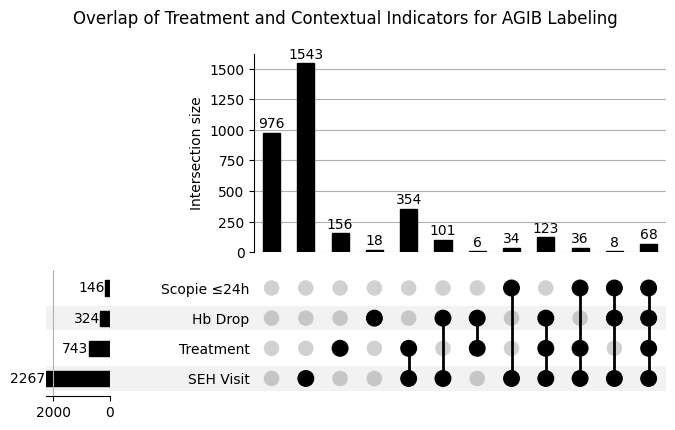

In [539]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_memberships

# Use your actual DataFrame and columns
memberships = []
for _, row in df.iterrows():
    sets = []
    if row["treatment_final"]:
        sets.append("Treatment")
    if row["final_hb_drop_evidence"]:
        sets.append("Hb Drop")
    if row["is_seh"]:
        sets.append("SEH Visit")
    if row["scopie_after_seh"]:
        sets.append("Scopie ≤24h")
    memberships.append(sets)

# Generate the UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(10, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.suptitle("Overlap of Treatment and Contextual Indicators for AGIB Labeling")
plt.show()


C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20156\3752516590.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

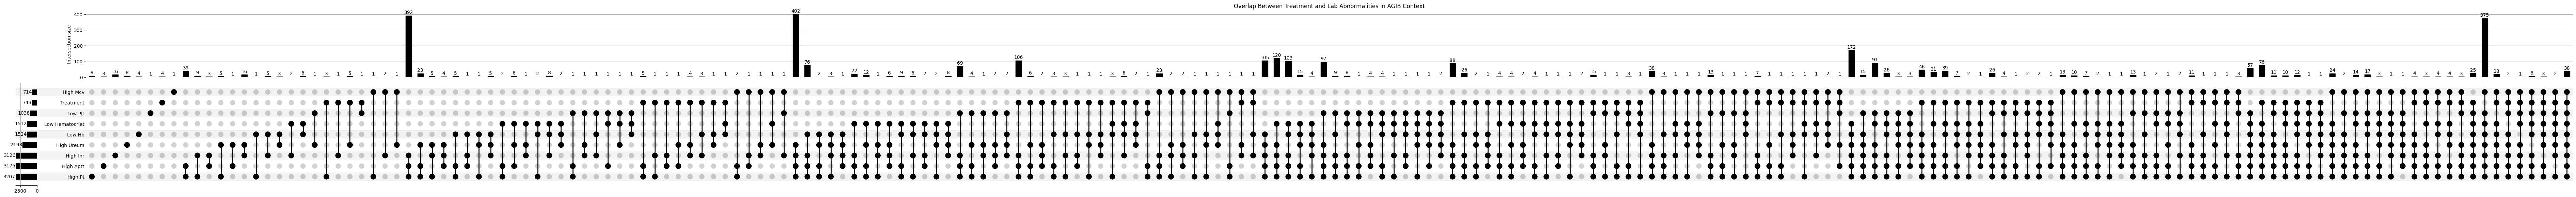

In [540]:
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# Define the individual variables to include
lab_columns = [
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]

# Initialize list to store set memberships
memberships = []

# Iterate through each row to build sets
for _, row in df.iterrows():
    sets = []
    if row.get("treatment_final"):
        sets.append("Treatment")
    for col in lab_columns:
        if row.get(col):
            sets.append(col.replace('_', ' ').title())  # Make names cleaner
    if sets:  # Only include rows with at least one True
        memberships.append(sets)

# Generate UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(12, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("Overlap Between Treatment and Lab Abnormalities in AGIB Context")
plt.tight_layout()
plt.show()


In [541]:
# print(df_subset.head())
# print(df_subset.dtypes)
# print("Total rows:", len(df_subset))
# print("Any row with at least one True:", (df_subset.any(axis=1).sum()))


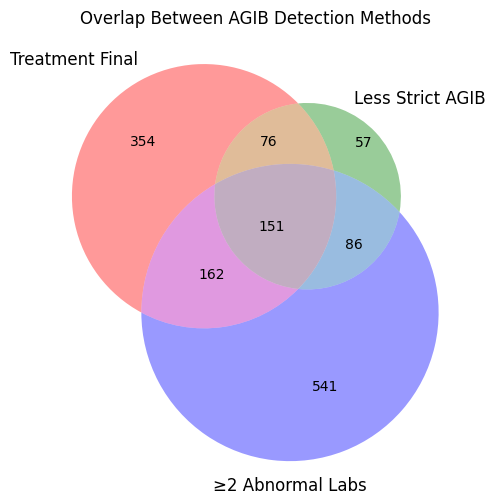

In [542]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Create the lab abnormality flag
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['treatment_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Create sets of patient IDs based on each condition
treatment_set = set(df[df['treatment_final']]['pseudo_id'])
less_strict_set = set(df[df['treatment_criteria_2_of_3']]['pseudo_id'])
lab_abnormal_set = set(df[df['abnormal_lab_panel']]['pseudo_id'])

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn3(
    [treatment_set, less_strict_set, lab_abnormal_set],
    set_labels=('Treatment Final', 'Less Strict AGIB', '≥2 Abnormal Labs')
)
plt.title('Overlap Between AGIB Detection Methods')
plt.show()



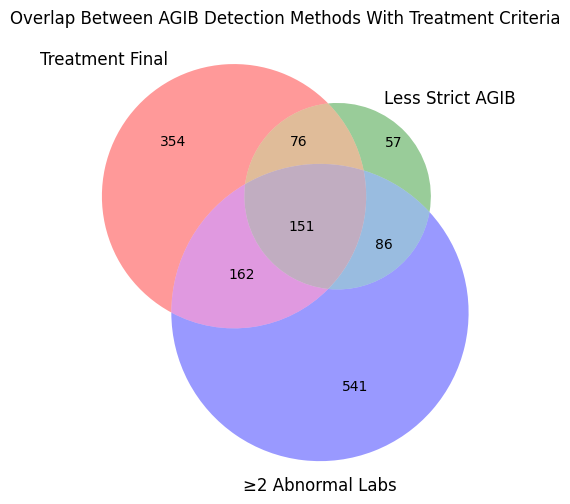

In [543]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Create the lab abnormality flag
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['treatment_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Create sets of patient IDs based on each condition
treatment_set = set(df[df['treatment_final']]['pseudo_id'])
less_strict_set = set(df[df['treatment_criteria_2_of_3']]['pseudo_id'])
lab_abnormal_set = set(df[df['abnormal_lab_panel']]['pseudo_id'])

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn3(
    [treatment_set, less_strict_set, lab_abnormal_set],
    set_labels=('Treatment Final', 'Less Strict AGIB', '≥2 Abnormal Labs')
)
plt.title('Overlap Between AGIB Detection Methods With Treatment Criteria')
plt.show()



<Figure size 1000x600 with 0 Axes>

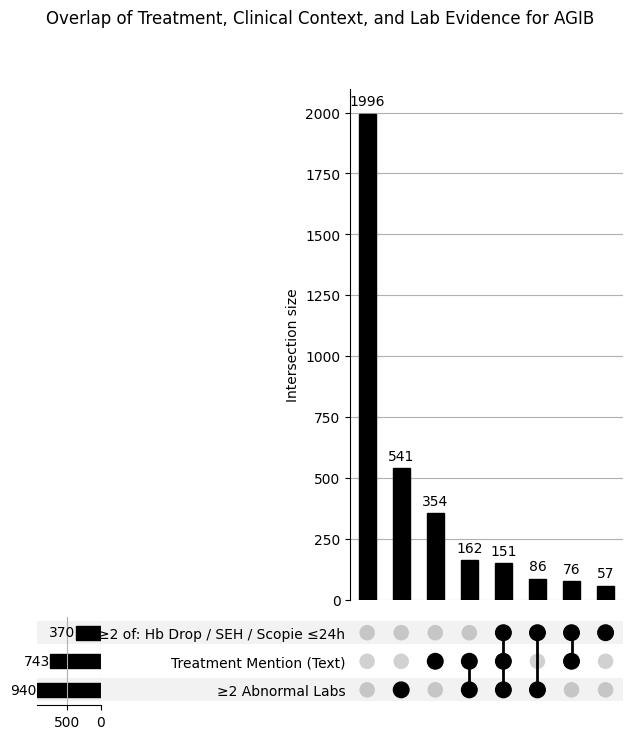

In [544]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Step 1: Define each group
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['treatment_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Step 2: Build membership list for UpSet
memberships = []
for _, row in df.iterrows():
    items = []
    if row['treatment_final']:
        items.append('Treatment Mention (Text)')
    if row['treatment_criteria_2_of_3']:
        items.append('≥2 of: Hb Drop / SEH / Scopie ≤24h')
    if row['abnormal_lab_panel']:
        items.append('≥2 Abnormal Labs')
    memberships.append(items)

# Step 3: Generate UpSet data and plot
upset_data = from_memberships(memberships)

plt.figure(figsize=(10, 6))
upset = UpSet(
    upset_data, 
    subset_size='count', 
    show_counts=True,
    sort_by='cardinality',
    intersection_plot_elements=15  # show more bars if needed
)
upset.plot()
plt.suptitle('Overlap of Treatment, Clinical Context, and Lab Evidence for AGIB')
plt.show()


Scopie

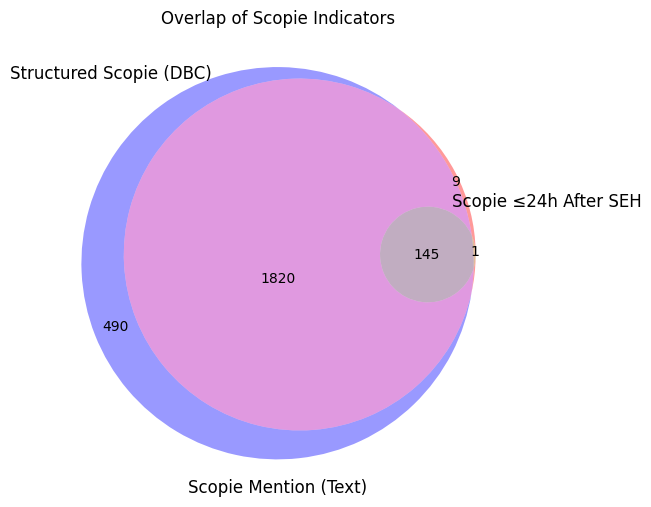

In [545]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define sets
set1 = set(df[df['is_scopie'] == True]['pseudo_id'].unique())           # Structured
set2 = set(df[df['scopie_after_seh'] == True]['pseudo_id'].unique())    # Timed scopie
set3 = set(df[df['scopie_final'] == True]['pseudo_id'].unique())        # Text-based

# Plot Venn diagram
plt.figure(figsize=(7, 6))
venn3(
    [set1, set2, set3],
    set_labels=(
        'Structured Scopie (DBC)', 
        'Scopie ≤24h After SEH', 
        'Scopie Mention (Text)'
    )
)
plt.title("Overlap of Scopie Indicators")
plt.show()


In [546]:
df['agib_label_scopie_treatment'] = (
    df['scopie_final'] & 
    df_final_complete['treatment_final']
    
)

df['agib_label_scopie_treatment'].value_counts()

False    2694
True      729
Name: agib_label_scopie_treatment, dtype: int64

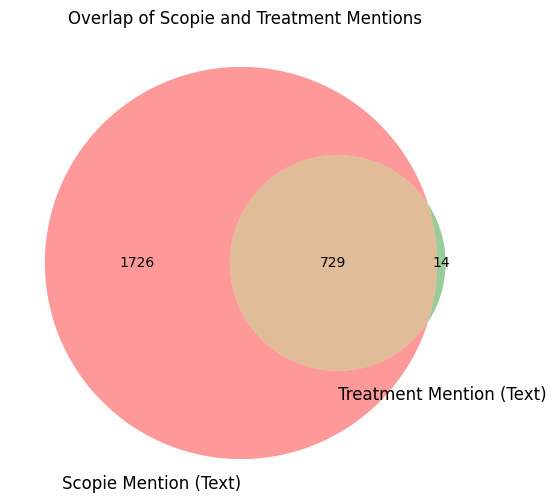

In [547]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define sets
set1 = set(df[df['scopie_final'] == True]['pseudo_id'].unique())           
set2 = set(df[df['treatment_final'] == True]['pseudo_id'].unique())    

# Plot Venn diagram
plt.figure(figsize=(7, 6))
venn2(
    [set1, set2],
    set_labels=(
        'Scopie Mention (Text)', 
        'Treatment Mention (Text)'
    )
)
plt.title("Overlap of Scopie and Treatment Mentions")
plt.show()


In [548]:
df['agib_label_scopie'] = (
    df['scopie_final'] & 

    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    
    
)

df['agib_label_scopie'].value_counts()

False    3070
True      353
Name: agib_label_scopie, dtype: int64

In [549]:
df['agib_label_scopie'] = (
    df['scopie_final'] & 
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['scopie_after_seh', 'final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 2)
    )
    
)

df['agib_label_scopie'].value_counts()

False    2553
True      870
Name: agib_label_scopie, dtype: int64

In [550]:
df['agib_label_scopie'] = (
    df['scopie_final'] & df['scopie_after_seh'] &
    (
    (df_final_complete[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
    ]].sum(axis=1, skipna=True) >= 2) |
    (    
    df[['final_hb_drop_evidence', 'is_seh'
                        ]].sum(axis=1, skipna=True) >= 1)
    )
    
)

df['agib_label_scopie'].value_counts()

False    3278
True      145
Name: agib_label_scopie, dtype: int64

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20156\1708696309.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

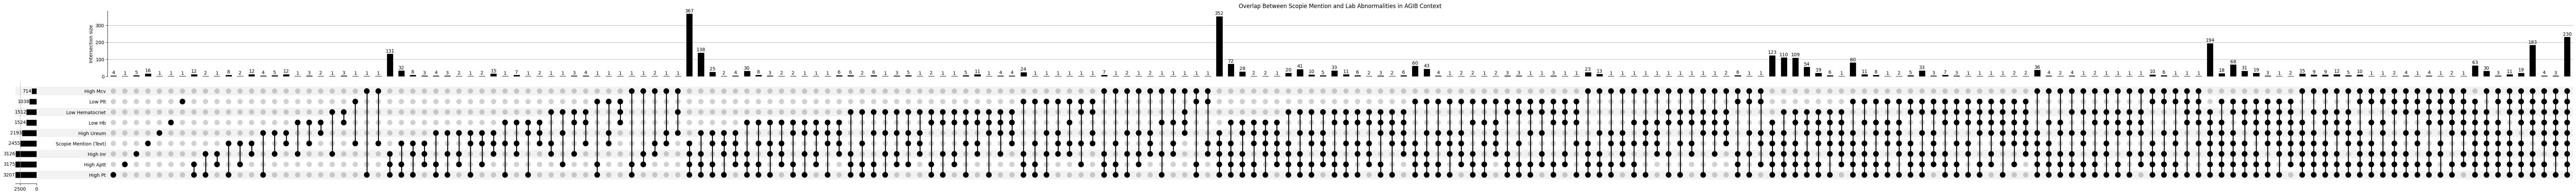

In [551]:
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# Define the individual variables to include
lab_columns = [
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]

# Initialize list to store set memberships
memberships = []

# Iterate through each row to build sets
for _, row in df.iterrows():
    sets = []
    if row.get("scopie_final"):
        sets.append("Scopie Mention (Text)")
    for col in lab_columns:
        if row.get(col):
            sets.append(col.replace('_', ' ').title())  # Make names cleaner
    if sets:  # Only include rows with at least one True
        memberships.append(sets)

# Generate UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(12, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title("Overlap Between Scopie Mention and Lab Abnormalities in AGIB Context")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

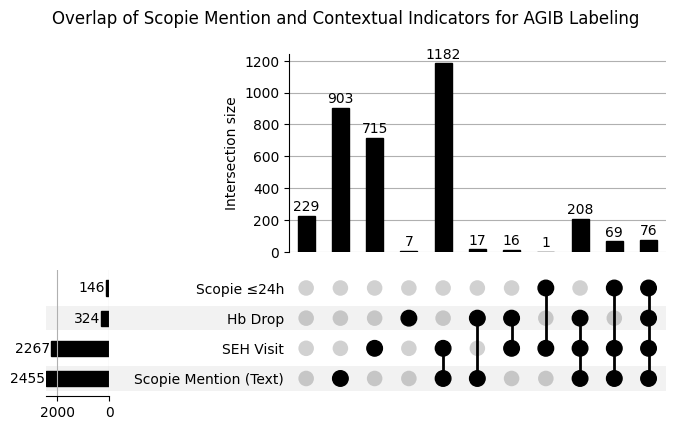

In [552]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_memberships

# Use your actual DataFrame and columns
memberships = []
for _, row in df.iterrows():
    sets = []
    if row["scopie_final"]:
        sets.append("Scopie Mention (Text)")
    if row["final_hb_drop_evidence"]:
        sets.append("Hb Drop")
    if row["is_seh"]:
        sets.append("SEH Visit")
    if row["scopie_after_seh"]:
        sets.append("Scopie ≤24h")
    memberships.append(sets)

# Generate the UpSet data
upset_data = from_memberships(memberships)

# Plot
plt.figure(figsize=(10, 6))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.suptitle("Overlap of Scopie Mention and Contextual Indicators for AGIB Labeling")
plt.show()


<Figure size 1000x600 with 0 Axes>

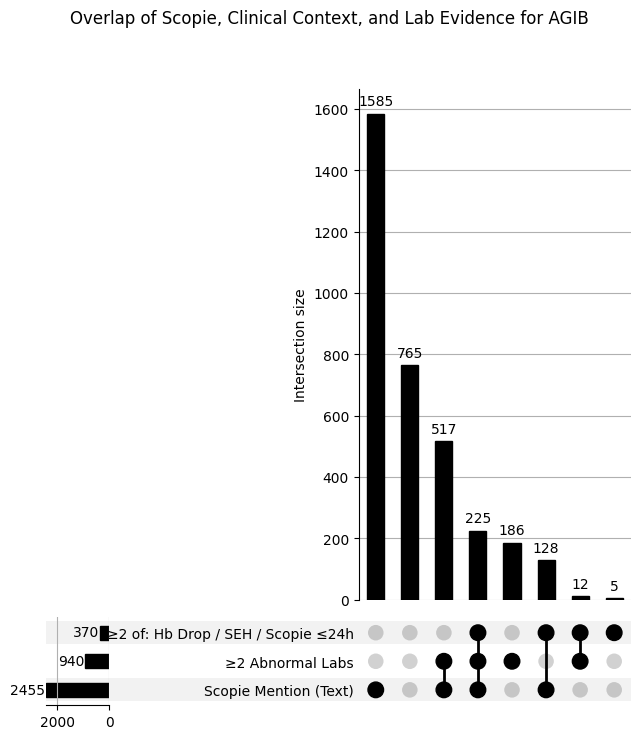

In [553]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Step 1: Define each group
df['abnormal_lab_panel'] = df[[
    'low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
    'high_mcv', 'high_inr', 'high_aptt', 'high_pt'
]].sum(axis=1, skipna=True) >= 2

df['scopie_criteria_2_of_3'] = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
]].sum(axis=1, skipna=True) >= 2

# Step 2: Build membership list for UpSet
memberships = []
for _, row in df.iterrows():
    items = []
    if row['scopie_final']:
        items.append('Scopie Mention (Text)')
    if row['scopie_criteria_2_of_3']:
        items.append('≥2 of: Hb Drop / SEH / Scopie ≤24h')
    if row['abnormal_lab_panel']:
        items.append('≥2 Abnormal Labs')
    memberships.append(items)

# Step 3: Generate UpSet data and plot
upset_data = from_memberships(memberships)

plt.figure(figsize=(10, 6))
upset = UpSet(
    upset_data, 
    subset_size='count', 
    show_counts=True,
    sort_by='cardinality',
    intersection_plot_elements=15  # show more bars if needed
)
upset.plot()
plt.suptitle('Overlap of Scopie, Clinical Context, and Lab Evidence for AGIB')
plt.show()


Final

In [554]:
# Define helper logic blocks
lab_criteria = (
#     (df_final_complete['low_hb'] == True) &
#     (df_final_complete['high_ureum'] == True)
# ) | (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2


treatment_pathway = (
    (df['treatment_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

gib_pathway = (
    (df['gib_final'] == True) & 
    (lab_criteria | contextual_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway

)

df['likely_agib_bleed'].value_counts()

False    2526
True      897
Name: likely_agib_bleed, dtype: int64

In [555]:
# Define helper logic blocks
lab_criteria = (

    df[['low_hb', 'low_hematocriet', 'low_plt', 'high_ureum',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2


treatment_pathway = (
    (df['treatment_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) & (
         contextual_criteria | lab_criteria
    )
)

gib_pathway = (
    (df['gib_final'] == True) & 
    (lab_criteria | contextual_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    # treatment_pathway |
    # scopie_pathway

    
    (treatment_pathway & (df['gib_final'] == True)) |
    (scopie_pathway& (df['gib_final'] == True))

)

df['likely_agib_bleed'].value_counts()

False    2860
True      563
Name: likely_agib_bleed, dtype: int64

In [556]:
# Define helper logic blocks
lab_criteria = (
    (df['low_hb'] == True) & 
    # df['high_ureum'] == True &
    (

    df[['low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2
    )

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2

treatment_pathway = (
    (df['treatment_final'] == True) & (
    contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) &     
    (contextual_criteria | lab_criteria)
)

gib_pathway = (
    (df['gib_final'] == True) & (contextual_criteria | lab_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    treatment_pathway |
    scopie_pathway
)

df['likely_agib_bleed'].value_counts()

False    2870
True      553
Name: likely_agib_bleed, dtype: int64

In [557]:
df['agib_label_seh_gib'] = (
    (df['agib_final'] |
    df['gib_final']) & 
    df['is_seh'] 
)

df['agib_label_seh_gib'].value_counts()

False    2584
True      839
Name: agib_label_seh_gib, dtype: int64

In [558]:
# Define helper logic blocks
lab_criteria = (
    (df['low_hb'] == True) & (
    # df_final_complete[['low_hb', 'low_hematocriet', 'low_plt',
    #                    'low_mcv', 'high_inr', 'high_aptt', 'high_pt']].sum(axis=1, skipna=True) >= 2
    df[['low_hematocriet', 'low_plt', 'high_ureum',
                   'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2 )

)

contextual_criteria = df[[
    'final_hb_drop_evidence', 'scopie_after_seh', 'is_seh'
    ]].sum(axis=1, skipna=True) >= 2


treatment_pathway = (
    (df['treatment_final'] == True) & (
        df['low_hb'] == True | contextual_criteria | lab_criteria
    )
)

scopie_pathway = (
    (df['scopie_final'] == True) &     
    (df['low_hb'] == True | contextual_criteria | lab_criteria)
)

gib_pathway = (
    (df['gib_final'] == True) & (contextual_criteria | lab_criteria)
    )


# Final likely AGIB decision
df['likely_agib_bleed'] = (
    (df['agib_final'] == True) |
    gib_pathway |
    (treatment_pathway & (df['gib_final'] == True)) |
    (scopie_pathway& (df['gib_final'] == True))
)

df['likely_agib_bleed'].value_counts()

False    2810
True      613
Name: likely_agib_bleed, dtype: int64

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20156\4049162690.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

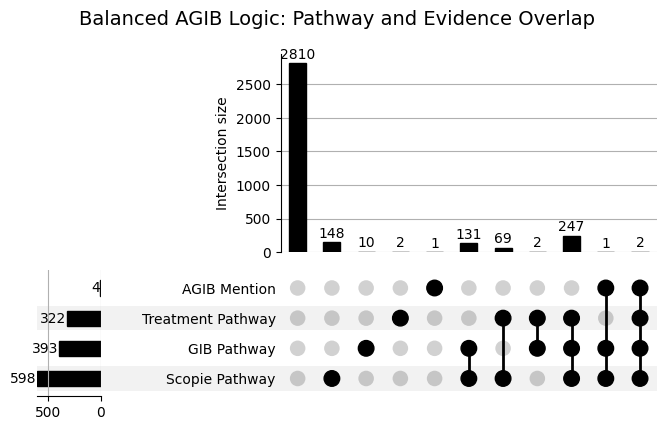

In [559]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import from_memberships, UpSet

# Define logic components (use same logic as your label)
lab_criteria = (
    (df['low_hb'] == True) & (
        df[['low_hematocriet', 'low_plt', 'high_ureum',
            'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 2
    )
)

contextual_criteria = (
    df[['final_hb_drop_evidence', 'scopie_after_seh', 'is_seh']]
    .sum(axis=1, skipna=True) >= 2
)

# Build pathway logic
df['GIB Pathway'] = df['gib_final'] & (lab_criteria | contextual_criteria)
df['Treatment Pathway'] = df['treatment_final'] & df['gib_final'] & (
    df['low_hb'] | contextual_criteria | lab_criteria
)
df['Scopie Pathway'] = df['scopie_final'] & df['gib_final'] & (
    df['low_hb'] | contextual_criteria | lab_criteria
)
df['AGIB Mention'] = df['agib_final']

# Create membership sets
memberships = []
for _, row in df.iterrows():
    items = []
    if row['GIB Pathway']:
        items.append('GIB Pathway')
    if row['Treatment Pathway']:
        items.append('Treatment Pathway')
    if row['Scopie Pathway']:
        items.append('Scopie Pathway')
    if row['AGIB Mention']:
        items.append('AGIB Mention')
    memberships.append(items)

# Create UpSet data and plot
upset_data = from_memberships(memberships)

plt.figure(figsize=(10, 6))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle('Balanced AGIB Logic: Pathway and Evidence Overlap', fontsize=14)
plt.tight_layout()
plt.show()


In [560]:
# Define stricter lab criteria: low Hb + at least one other abnormality
lab_strict = (
    (df['low_hb'] == True) &
    (
        df[['low_hematocriet', 'low_plt', 'high_ureum',
            'high_mcv', 'high_inr', 'high_aptt', 'high_pt']].fillna(False).sum(axis=1) >= 1
    )
)

# All contextual requirements
context_strict = (
    df['is_seh'] &
    df['scopie_after_seh'] &
    df['final_hb_drop_evidence']
)

# GIB text mention required
strict_text = df['gib_final']

# Final strict label
df['strict_agib_label_structured_only'] = strict_text & context_strict & lab_strict

print(df['strict_agib_label_structured_only'].value_counts())


False    3365
True       58
Name: strict_agib_label_structured_only, dtype: int64


In [561]:
df['strict_agib_label_strong_context'] = (
    df['gib_final'] &
    df['treatment_final'] &
    df['scopie_final'] &
    df['is_seh'] &
    df['scopie_after_seh'] &
    df['final_hb_drop_evidence'] &
    df['low_hb'] &
    (
        df[['low_hematocriet', 'low_plt', 'high_ureum', 'high_mcv',
            'high_inr', 'high_aptt', 'high_pt']]
        .fillna(False).sum(axis=1) >= 1
    )
)

print(df['strict_agib_label_strong_context'].value_counts())


False    3369
True       54
Name: strict_agib_label_strong_context, dtype: int64


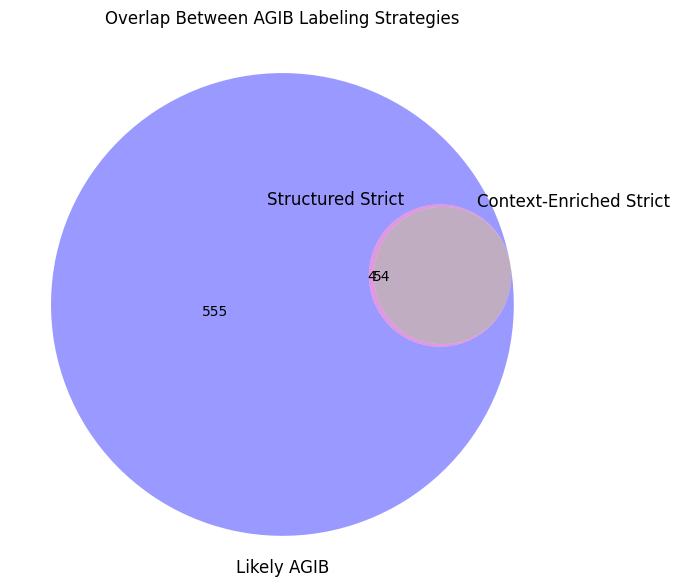

In [562]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define the sets
structured_strict = set(df[df['strict_agib_label_structured_only']]['pseudo_id'])
context_enriched = set(df[df['strict_agib_label_strong_context']]['pseudo_id'])
broad_label = set(df[df['likely_agib_bleed']]['pseudo_id'])

# Plot
plt.figure(figsize=(8, 6))
venn3(
    [structured_strict, context_enriched, broad_label],
    set_labels=('Structured Strict', 'Context-Enriched Strict', 'Likely AGIB')
)
plt.title("Overlap Between AGIB Labeling Strategies")
plt.tight_layout()
plt.show()


C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20156\3649066351.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

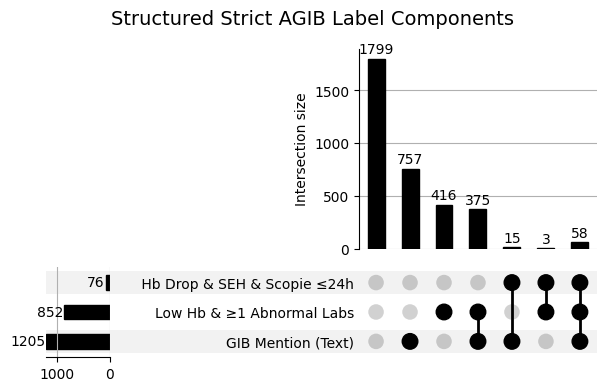

In [563]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Define individual components
df['strict_labs'] = (
    (df['low_hb'] == True) &
    (df[['low_hematocriet', 'low_plt', 'high_ureum',
         'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
     .fillna(False).sum(axis=1) >= 1)
)

df['strict_context'] = (
    df['is_seh'] & df['scopie_after_seh'] & df['final_hb_drop_evidence']
)

df['strict_text'] = df['gib_final']

# Create readable labels
label_map = {
    'strict_text': 'GIB Mention (Text)',
    'strict_context': ' Hb Drop & SEH & Scopie ≤24h',
    'strict_labs': 'Low Hb & ≥1 Abnormal Labs'
}

# Construct memberships using renamed labels
memberships = []
for _, row in df.iterrows():
    sets = []
    if row['strict_text']:
        sets.append(label_map['strict_text'])
    if row['strict_context']:
        sets.append(label_map['strict_context'])
    if row['strict_labs']:
        sets.append(label_map['strict_labs'])
    memberships.append(sets)

# Generate UpSet data and plot
from upsetplot import from_memberships, UpSet

upset_data = from_memberships(memberships)
plt.figure(figsize=(10, 6))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle("Structured Strict AGIB Label Components", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20156\2826200509.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x700 with 0 Axes>

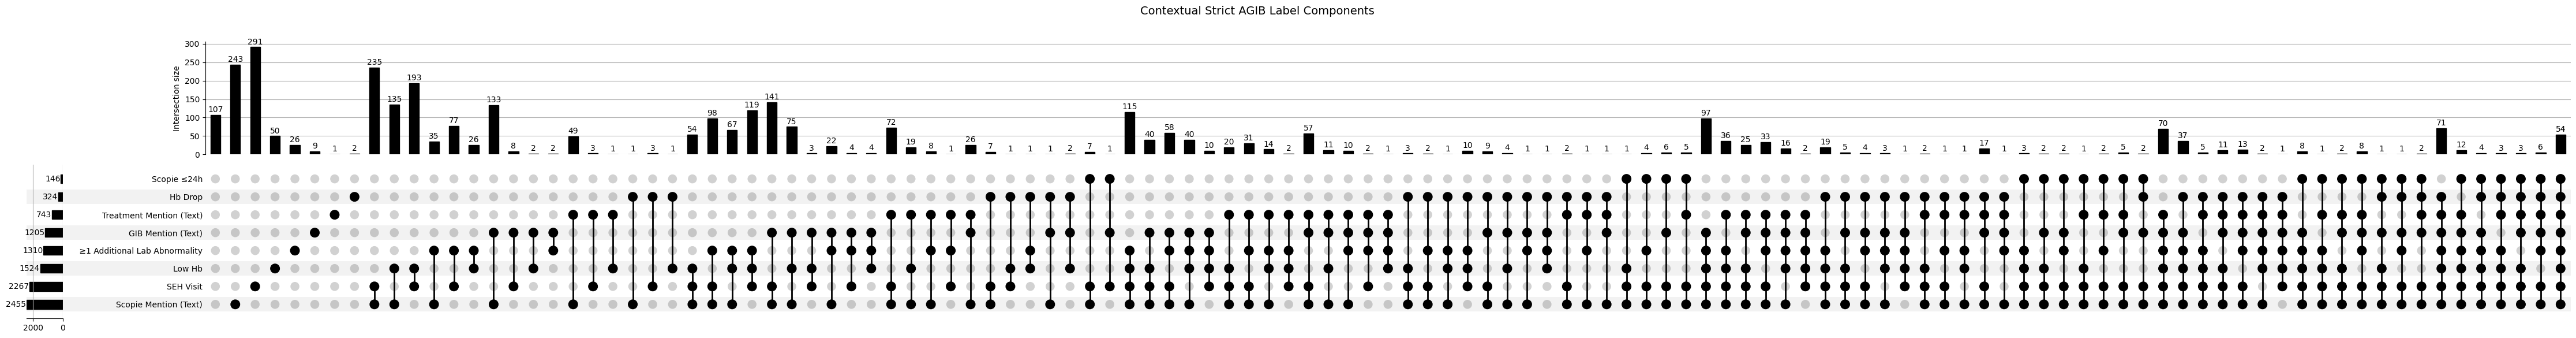

In [564]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import from_memberships, UpSet

# Define components of the strict rule
df['strong_text'] = df['gib_final']
df['strong_treatment'] = df['treatment_final']
df['strong_scopie'] = df['scopie_final']
df['strong_seh'] = df['is_seh']
df['strong_scopie_24h'] = df['scopie_after_seh']
df['strong_hb_drop'] = df['final_hb_drop_evidence']
df['strong_low_hb'] = df['low_hb']
df['strong_lab_extra'] = (
    df[['low_hematocriet', 'low_plt', 'high_ureum',
        'high_mcv', 'high_inr', 'high_aptt', 'high_pt']]
    .fillna(False).sum(axis=1) >= 1
)

# Label map for better readability
label_map = {
    'strong_text': 'GIB Mention (Text)',
    'strong_treatment': 'Treatment Mention (Text)',
    'strong_scopie': 'Scopie Mention (Text)',
    'strong_seh': 'SEH Visit',
    'strong_scopie_24h': 'Scopie ≤24h',
    'strong_hb_drop': 'Hb Drop',
    'strong_low_hb': 'Low Hb',
    'strong_lab_extra': ' ≥1 Additional Lab Abnormality'
}

# Construct membership list for upsetplot
memberships = []
for _, row in df.iterrows():
    sets = []
    for key, label in label_map.items():
        if row[key]:
            sets.append(label)
    memberships.append(sets)

# Create and plot the UpSet diagram
upset_data = from_memberships(memberships)
plt.figure(figsize=(12, 7))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle("Contextual Strict AGIB Label Components", fontsize=14)
plt.tight_layout()
plt.show()


BERTopic

In [575]:
# df_BERT = pd.read_csv('df_BERTopic_labels.csv')
# print(df_BERT[df_BERT['agib_classification'] == "AGIB-related"]['pseudo_id'].nunique())
# df_BERT

path = 'a:/test-data'
file_regex = 'df_BERTopic_labels_test'
df_BERT = pd.read_csv(f'{path}/{file_regex}.csv')
print(df_BERT[df_BERT['agib_classification'] == "AGIB-related"]['pseudo_id'].nunique())

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_20156\3840024696.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BERT = pd.read_csv(f'{path}/{file_regex}.csv')


65


In [566]:
df['agib_BERTopic'] = df['pseudo_id'].isin(df_BERT[df_BERT['agib_classification'] == "AGIB-related"]['pseudo_id'])
df['agib_BERTopic'].value_counts()

False    3332
True       91
Name: agib_BERTopic, dtype: int64

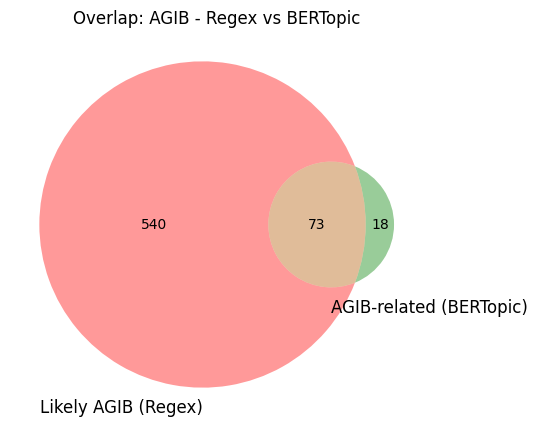

In [567]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
venn2(
    subsets=(
        set(df[df['likely_agib_bleed'] == True]['pseudo_id']),
        set(df[df['agib_BERTopic'] == True]['pseudo_id'])
    ),
    set_labels=('Likely AGIB (Regex)', 'AGIB-related (BERTopic)')
)
plt.title("Overlap: AGIB - Regex vs BERTopic")
plt.show()


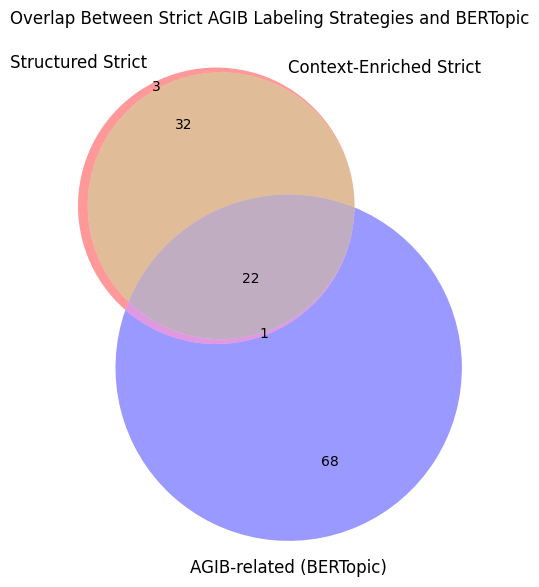

In [568]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define the sets
structured_strict = set(df[df['strict_agib_label_structured_only']]['pseudo_id'])
context_enriched = set(df[df['strict_agib_label_strong_context']]['pseudo_id'])
broad_label = set(df[df['agib_BERTopic']]['pseudo_id'])

# Plot
plt.figure(figsize=(8, 6))
venn3(
    [structured_strict, context_enriched, broad_label],
    set_labels=('Structured Strict', 'Context-Enriched Strict', 'AGIB-related (BERTopic)')
)
plt.title("Overlap Between Strict AGIB Labeling Strategies and BERTopic")
plt.tight_layout()
plt.show()

In [569]:
# y_true = [1 if label == True else 0 for label in df['likely_agib_bleed']]
# y_pred = [1 if label == True else 0 for label in df['agib_BERTopic']]

# print(y_true)
# print(y_pred)

# # print(f"--- Evaluation for: {agib_BERTopic} based on {likely_agib_bleed}---")
# print("Accuracy :", accuracy_score(y_true, y_pred))
# print("Precision:", precision_score(y_true, y_pred))
# print("Recall   :", recall_score(y_true, y_pred))  # Sensitivity — how many AGIBs you captured
# print("F1 Score :", f1_score(y_true, y_pred))
# print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
# print()

In [570]:
# y_true = [1 if label == True else 0 for label in df['strict_agib_label_strong_context']]
# y_pred = [1 if label == True else 0 for label in df['agib_BERTopic']]

# print(y_true)
# print(y_pred)

# # print(f"--- Evaluation for: {agib_BERTopic} based on {likely_agib_bleed}---")
# print("Accuracy :", accuracy_score(y_true, y_pred))
# print("Precision:", precision_score(y_true, y_pred))
# print("Recall   :", recall_score(y_true, y_pred))  # Sensitivity — how many AGIBs you captured
# print("F1 Score :", f1_score(y_true, y_pred))
# print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
# print()

In [573]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classifier(pred_col):
    y_true = df['true_label']
    y_pred = df[pred_col].fillna(False).astype(int)

    print(f"--- Evaluation for: {pred_col} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))  # Sensitivity — how many AGIBs you captured
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    print()

# Evaluate your detection approaches
evaluate_classifier('agib_final')
evaluate_classifier('likely_agib_bleed')
evaluate_classifier('strict_agib_label_strong_context')
evaluate_classifier('strict_agib_label_structured_only')
# evaluate_classifier('(a)gib_final')  # if this is another combined signal


--- Evaluation for: agib_final ---
Accuracy : 0.9699094361671049
Precision: 0.25
Recall   : 0.009900990099009901
F1 Score : 0.01904761904761905
Confusion matrix:
 [[3319    3]
 [ 100    1]]

--- Evaluation for: likely_agib_bleed ---
Accuracy : 0.838737949167397
Precision: 0.13213703099510604
Recall   : 0.801980198019802
F1 Score : 0.226890756302521
Confusion matrix:
 [[2790  532]
 [  20   81]]

--- Evaluation for: strict_agib_label_strong_context ---
Accuracy : 0.9687408705813614
Precision: 0.4444444444444444
Recall   : 0.2376237623762376
F1 Score : 0.3096774193548387
Confusion matrix:
 [[3292   30]
 [  77   24]]

--- Evaluation for: strict_agib_label_structured_only ---
Accuracy : 0.9681565877884897
Precision: 0.43103448275862066
Recall   : 0.24752475247524752
F1 Score : 0.31446540880503143
Confusion matrix:
 [[3289   33]
 [  76   25]]

